In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
import plotly.express as px

In [2]:
df = pd.read_csv("Airbnb_Data.csv")
df.head()

id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee  ...   latitude   longitude  \
0  Real Bed              strict          True  ...  40.696524  -73.991617   
1  Real Bed              strict          True  ...  40.766115  -73.989040   
2  Real Bed            moderate          True  ...  40.808110  -73.943756   
3  Real Bed            flexible          True  ...  37.772004 -122.431619   
4  Real Bed            moderate          True  ...  38.925627  -77.034596   

                                       name     neighbourhood  \
0            Beautiful brownstone 1-bedroom  Brooklyn Heights   
1  Superb 3BR Apt Located Near Times Square    Hell's Kitchen   
2                          The Garden Oasis            Harlem   
3        Beautiful Flat in the Heart of SF!      Lower Haight   
4                Great studio in midtown DC  Columbia Heights   

  number_of_reviews review_scores_rating  \
0                 2                100.0   
1                 6                 93.0   
2                10                 92.0   
3                 0                  NaN   
4                 4                 40.0   

                                       thumbnail_url  zipcode bedrooms  beds  
0  https://a0.muscache.com/im/pictures/6d7cbbf7-c...    11201      1.0   1.0  
1  https://a0.muscache.com/im/pictures/348a55fe-4...    10019      3.0   3.0  
2  https://a0.muscache.com/im/pictures/6fae5362-9...    10027      1.0   3.0  
3  https://a0.muscache.com/im/pictures/72208dad-9...  94117.0      2.0   2.0  
4                                                NaN    20009      0.0   1.0  

[5 rows x 29 columns]

In [3]:
df['amenities'].unique()

array(['{"Wireless Internet","Air conditioning",Kitchen,Heating,"Family/kid friendly",Essentials,"Hair dryer",Iron,"translation missing: en.hosting_amenity_50"}',
       '{"Wireless Internet","Air conditioning",Kitchen,Heating,"Family/kid friendly",Washer,Dryer,"Smoke detector","Fire extinguisher",Essentials,Shampoo,Hangers,"Hair dryer",Iron,"translation missing: en.hosting_amenity_50"}',
       '{TV,"Cable TV","Wireless Internet","Air conditioning",Kitchen,Breakfast,"Buzzer/wireless intercom",Heating,"Family/kid friendly","Smoke detector","Carbon monoxide detector","Fire extinguisher",Essentials,Shampoo,Hangers,"Hair dryer",Iron,"Laptop friendly workspace","translation missing: en.hosting_amenity_50"}',
       ...,
       '{TV,"Cable TV",Internet,"Wireless Internet",Kitchen,"Free parking on premises",Heating,"Family/kid friendly",Washer,Dryer,"Smoke detector",Essentials,Shampoo,Hangers,"Hair dryer","translation missing: en.hosting_amenity_50"}',
       '{TV,Internet,"Wireless Internet

In [4]:
df.isna().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [5]:
len(df['property_type'].unique())

35

In [6]:
def find_unique_value_counts():
    data_columns = ['property_type', 'room_type', 'amenities', 'bathrooms', 'bed_type', 
                   'cancellation_policy', 'cleaning_fee', 'name', 'city', 'neighbourhood', 'bedrooms', 'beds']

    for col in data_columns:
        print(f"Total unique value: {col} - {len(df[col].unique())}")

find_unique_value_counts()

Total unique value: property_type - 35
Total unique value: room_type - 3
Total unique value: amenities - 67122
Total unique value: bathrooms - 18
Total unique value: bed_type - 5
Total unique value: cancellation_policy - 5
Total unique value: cleaning_fee - 2
Total unique value: name - 73359
Total unique value: city - 6
Total unique value: neighbourhood - 620
Total unique value: bedrooms - 12
Total unique value: beds - 19


In [7]:
df.head()

id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee  ...   latitude   longitude  \
0  Real Bed              strict          True  ...  40.696524  -73.991617   
1  Real Bed              strict          True  ...  40.766115  -73.989040   
2  Real Bed            moderate          True  ...  40.808110  -73.943756   
3  Real Bed            flexible          True  ...  37.772004 -122.431619   
4  Real Bed            moderate          True  ...  38.925627  -77.034596   

                                       name     neighbourhood  \
0            Beautiful brownstone 1-bedroom  Brooklyn Heights   
1  Superb 3BR Apt Located Near Times Square    Hell's Kitchen   
2                          The Garden Oasis            Harlem   
3        Beautiful Flat in the Heart of SF!      Lower Haight   
4                Great studio in midtown DC  Columbia Heights   

  number_of_reviews review_scores_rating  \
0                 2                100.0   
1                 6                 93.0   
2                10                 92.0   
3                 0                  NaN   
4                 4                 40.0   

                                       thumbnail_url  zipcode bedrooms  beds  
0  https://a0.muscache.com/im/pictures/6d7cbbf7-c...    11201      1.0   1.0  
1  https://a0.muscache.com/im/pictures/348a55fe-4...    10019      3.0   3.0  
2  https://a0.muscache.com/im/pictures/6fae5362-9...    10027      1.0   3.0  
3  https://a0.muscache.com/im/pictures/72208dad-9...  94117.0      2.0   2.0  
4                                                NaN    20009      0.0   1.0  

[5 rows x 29 columns]

In [8]:
def unique_list(item):
    for i in item:
        print(f'{i} : {df[i].unique()}\n')

item = ['bathrooms', 'bedrooms', 'beds', 'property_type']
unique_list(item)

bathrooms : [1.  1.5 2.  nan 2.5 3.  0.5 4.5 5.  0.  4.  3.5 5.5 7.5 6.  8.  7.  6.5]

bedrooms : [ 1.  3.  2.  0.  4. nan  5.  6.  7.  8.  9. 10.]

beds : [ 1.  3.  2.  7.  4.  6.  5. nan 10.  8. 16.  9. 13. 12. 11. 14. 15.  0.
 18.]

property_type : ['Apartment' 'House' 'Condominium' 'Loft' 'Townhouse' 'Hostel'
 'Guest suite' 'Bed & Breakfast' 'Bungalow' 'Guesthouse' 'Dorm' 'Other'
 'Camper/RV' 'Villa' 'Boutique hotel' 'Timeshare' 'In-law' 'Boat'
 'Serviced apartment' 'Castle' 'Cabin' 'Treehouse' 'Tipi' 'Vacation home'
 'Tent' 'Hut' 'Casa particular' 'Chalet' 'Yurt' 'Earth House'
 'Parking Space' 'Train' 'Cave' 'Lighthouse' 'Island']



In [9]:
df.sort_values('city', ascending=True)

id  log_price property_type        room_type  \
10653  13767676   4.532599     Apartment     Private room   
15631  14427313   5.003946   Condominium     Private room   
35536   7677499   4.779123     Apartment  Entire home/apt   
46836  18120887   4.595120     Apartment  Entire home/apt   
46835  13687465   5.298317     Apartment  Entire home/apt   
...         ...        ...           ...              ...   
38791  16179778   5.926926     Apartment  Entire home/apt   
62981  20545358   4.976734     Apartment     Private room   
62984  18503779   4.744932     Apartment     Private room   
62953  14760208   4.859812     Apartment  Entire home/apt   
62626  16179580   5.416100     Apartment     Private room   

                                               amenities  accommodates  \
10653  {"Air conditioning",Heating,"Smoke detector","...             2   
15631  {TV,"Cable TV","Wireless Internet",Kitchen,Hea...             3   
35536  {TV,"Cable TV","Wireless Internet","Air condit...             3   
46836  {TV,"Cable TV","Wireless Internet","Air condit...             6   
46835  {TV,"Cable TV",Internet,"Wireless Internet","A...             5   
...                                                  ...           ...   
38791  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             5   
62981  {TV,Internet,"Wireless Internet",Kitchen,Break...             2   
62984  {TV,Internet,"Wireless Internet",Pool,Kitchen,...             3   
62953  {TV,"Cable TV",Internet,"Wireless Internet","W...             6   
62626  {"Wireless Internet",Kitchen,"Free parking on ...             2   

       bathrooms  bed_type cancellation_policy  cleaning_fee  ...   latitude  \
10653        1.0  Real Bed            flexible          True  ...  42.348116   
15631        1.0  Real Bed              strict         False  ...  42.384861   
35536        1.0  Real Bed              strict          True  ...  42.329152   
46836        2.0  Real Bed              strict          True  ...  42.361086   
46835        1.0  Real Bed            moderate          True  ...  42.343160   
...          ...       ...                 ...           ...  ...        ...   
38791        2.0  Real Bed            moderate          True  ...  37.727706   
62981        1.5  Real Bed              strict          True  ...  37.767227   
62984        1.0  Real Bed            flexible         False  ...  37.784994   
62953        1.0  Real Bed              strict          True  ...  37.777855   
62626        1.0  Real Bed            flexible          True  ...  37.778224   

        longitude                                              name  \
10653  -71.061650                          Chinatown Single Bedroom   
15631  -71.078061                     Master Room with Private Bath   
35536  -71.111302    Contemporary Studio near Fenway + Pool & Gym!!   
46836  -71.067712     Charming 2BR/2BA Duplex in Beacon Hill by MGH   
46835  -71.085742                       Sunny Brownstone - Sleeps 5   
...           ...                                               ...   
38791 -122.440149                    SPACIOUS & REMODELED VICTORIAN   
62981 -122.437682                 Stunning Views w/private 1/2 bath   
62984 -122.398201                      Downtown SF - BART/Shop/Tour   
62953 -122.498965  Modern Zen 2 beds 1 bath Apt Beach GG Park Ocean   
62626 -122.414381  Master Bedroom in Luxury Modern Highrise (SOMA)!   

           neighbourhood number_of_reviews review_scores_rating  \
10653          Chinatown                 2                 60.0   
15631        Charlestown                 7                 91.0   
35536      Jamaica Plain                 1                100.0   
46836        Beacon Hill                 0                  NaN   
46835     Fenway/Kenmore                12                 92.0   
...                  ...               ...                  ...   
38791    Mission Terrace                10                 98.0   
62981     Haight-Ashbury               18

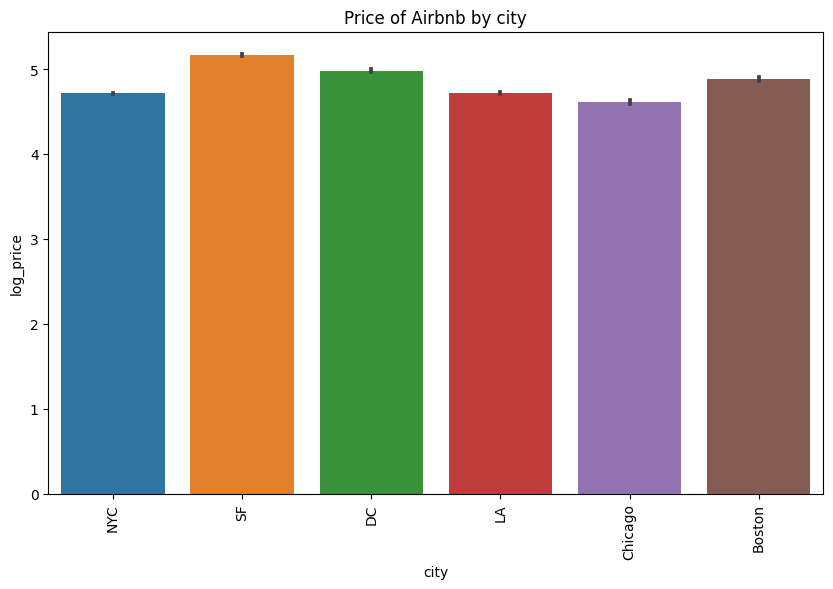

In [10]:
plt.figure(figsize=(10,6))
sns.categorical.barplot(data=df, x='city', y='log_price')
plt.xticks(rotation=90)
plt.title('Price of Airbnb by city')
plt.show()

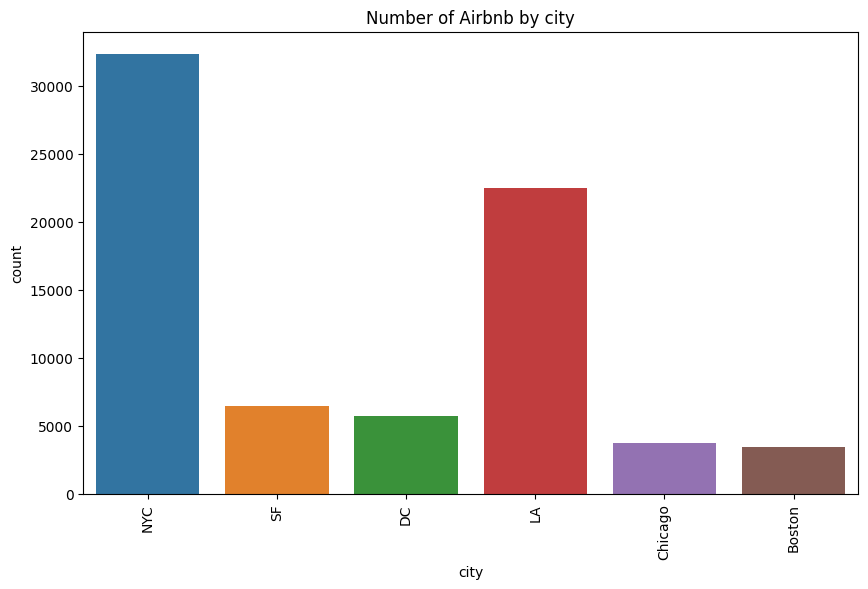

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='city')
plt.xticks(rotation=90)
plt.title('Number of Airbnb by city')
plt.show()

In [12]:
def createMap(df, city=None):
    if city: df = df[df['city'] == city]

    fig = px.scatter_mapbox(
        df,
        lat = 'latitude',
        lon = 'longitude',
        hover_data=['log_price', 'property_type'],
        color='log_price'
    )

    fig.update_layout(mapbox_style="open-street-map")
    fig.update_layout(margin={'r':0, 't':0, 'l':0, 'b':0})

    return fig

fig = createMap(df, city='NYC')
fig.show()

Based on my analysis, I will utilize data from New York City(NYC).

In [18]:
df = pd.read_csv('data_clean.csv')
len(df)


32349

In [14]:
df.head()

log_price  accommodates  bathrooms   latitude  longitude  \
0   5.010635             3        1.0  40.696524 -73.991617   
1   5.129899             7        1.0  40.766115 -73.989040   
2   4.976734             5        1.0  40.808110 -73.943756   
3   4.605170             2        1.0  40.723883 -73.983880   
4   4.882802             2        1.0  40.719086 -73.990285   

   review_scores_rating  bedrooms  beds  room_type_Private room  \
0                 100.0         1     1                     0.0   
1                  93.0         3     3                     0.0   
2                  92.0         1     3                     0.0   
3                  93.0         1     1                     1.0   
4                  86.0         1     2                     0.0   

   room_type_Shared room  ...  property_type_Serviced apartment  \
0                    0.0  ...                               0.0   
1                    0.0  ...                               0.0   
2                    0.0  ...                               0.0   
3                    0.0  ...                               0.0   
4                    0.0  ...                               0.0   

   property_type_Tent  property_type_Timeshare  property_type_Tipi  \
0                 0.0                      0.0                 0.0   
1                 0.0                      0.0                 0.0   
2                 0.0                      0.0                 0.0   
3                 0.0                      0.0                 0.0   
4                 0.0                      0.0                 0.0   

   property_type_Townhouse  property_type_Train  property_type_Treehouse  \
0                      0.0                  0.0                      0.0   
1                      0.0                  0.0                      0.0   
2                      0.0                  0.0                      0.0   
3                      0.0                  0.0                      0.0   
4                      0.0                  0.0                      0.0   

   property_type_Vacation home  property_type_Villa  property_type_Yurt  
0                          0.0                  0.0                 0.0  
1                          0.0                  0.0                 0.0  
2                          0.0                  0.0                 0.0  
3                          0.0                  0.0                 0.0  
4                          0.0                  0.0                 0.0  

[5 rows x 48 columns]

In [15]:
df.isna().sum()

log_price                           0
accommodates                        0
bathrooms                           0
latitude                            0
longitude                           0
review_scores_rating                0
bedrooms                            0
beds                                0
room_type_Private room              0
room_type_Shared room               0
bed_type_Couch                      0
bed_type_Futon                      0
bed_type_Pull-out Sofa              0
bed_type_Real Bed                   0
property_type_Bed & Breakfast       0
property_type_Boat                  0
property_type_Boutique hotel        0
property_type_Bungalow              0
property_type_Cabin                 0
property_type_Camper/RV             0
property_type_Casa particular       0
property_type_Castle                0
property_type_Cave                  0
property_type_Chalet                0
property_type_Condominium           0
property_type_Dorm                  0
property_typ

In [16]:
def unique_list(item):
    for i in item:
        print(f'{i} : {df[i].unique()}\n')

item = ['bathrooms', 'review_scores_rating', 'bedrooms', 'beds']

unique_list(item)

bathrooms : [1.  1.5 1.1 2.  3.5 0.5 0.  3.  2.5 4.5 4.  5.  8.  5.5 6. ]

review_scores_rating : [100.   93.   92.   86.   72.   89.   88.   96.   84.   93.5  94.   80.
  87.   95.   85.   99.   70.   98.   97.   91.   90.   76.   60.   83.
  82.   75.   55.   73.   40.   20.   67.   71.   79.   78.   81.   47.
  74.   68.   66.   50.   77.   65.   53.   64.   69.   27.   62.   57.
  56.   63. ]

bedrooms : [ 1  3  2  0  4  5  7  6 10  8  9]

beds : [ 1  3  2  6  4  5  7  8 10 13  9 12 16 11  0 15 18]



C:\Users\ASUS ROG\AppData\Local\Temp\ipykernel_44648\1951664721.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




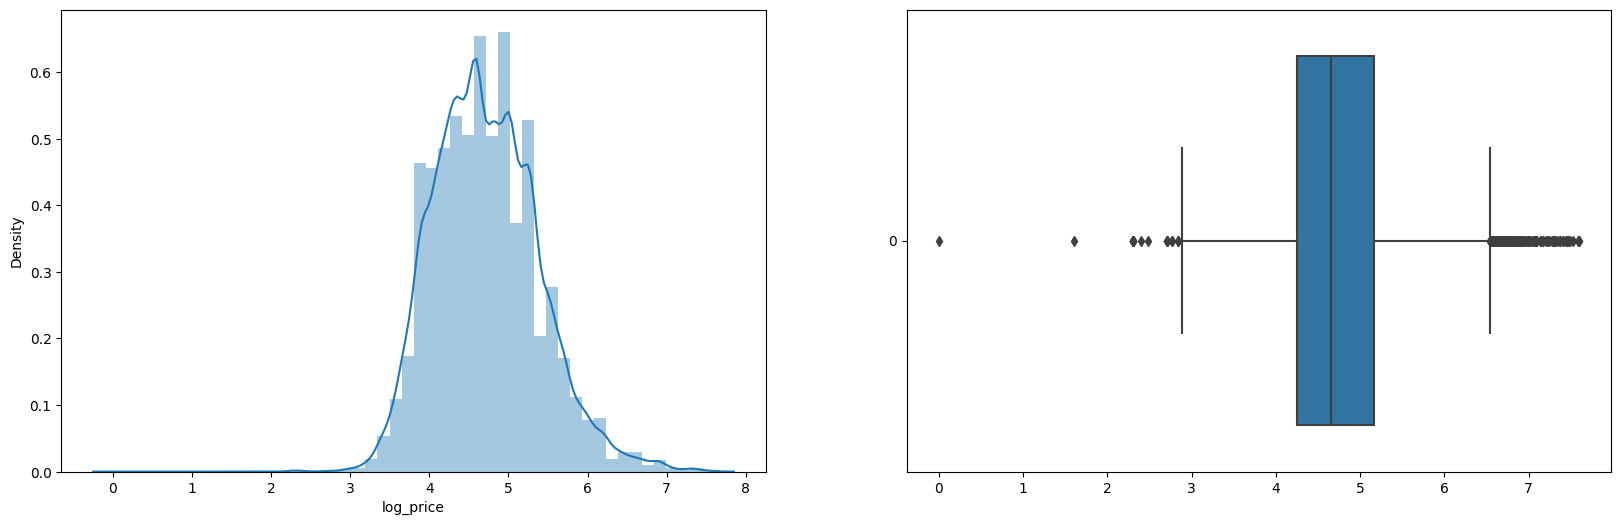

In [17]:
fig =plt.figure(figsize=(20, 6))

fig.add_subplot(1, 2, 1)
sns.distplot(df['log_price'])

fig.add_subplot(1, 2, 2)
sns.boxplot(df['log_price'], orient='h')

plt.show()